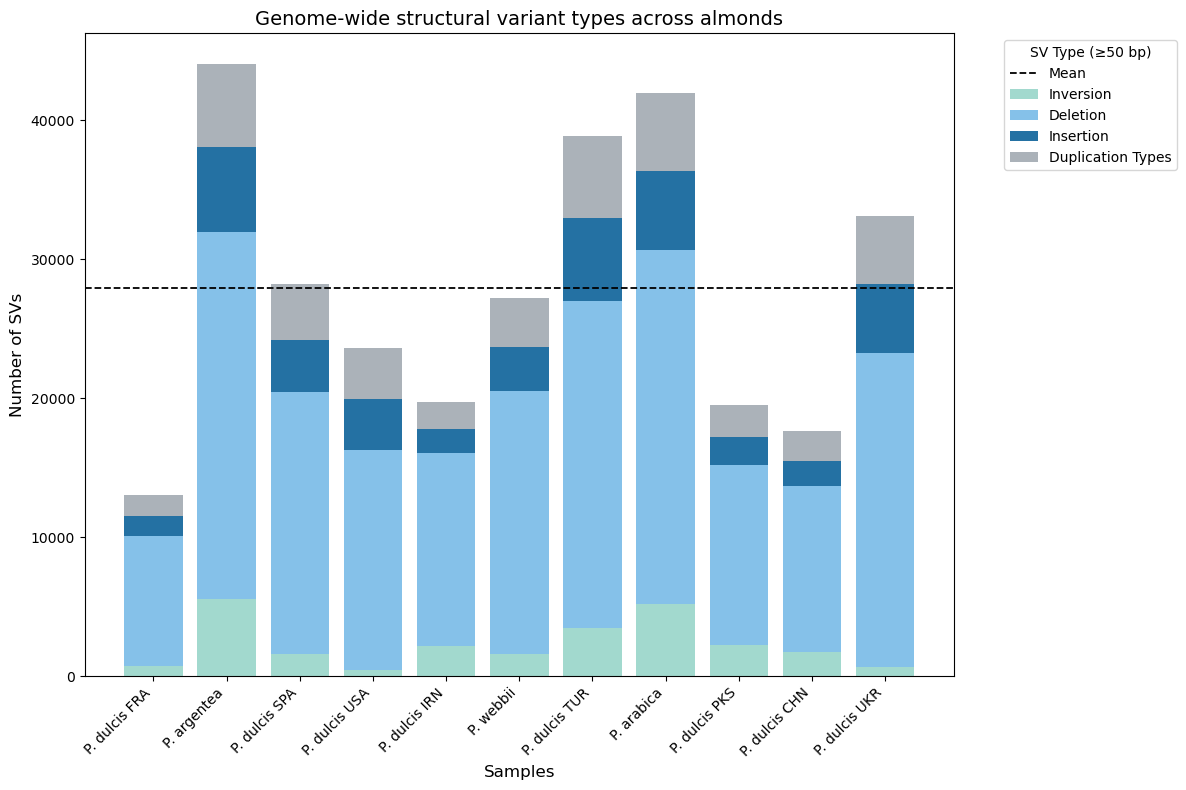

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

 
data = {
    'Sample': ['P. dulcis FRA', 'P. argentea', 'P. dulcis SPA', 'P. dulcis USA', 'P. dulcis IRN',
               'P. webbii', 'P. dulcis TUR', 'P. arabica', 'P. dulcis PKS', 'P. dulcis CHN', 'P. dulcis UKR'],
    'Inversion': [750, 5548, 1620, 440, 2140, 1608, 3431, 5219, 2236, 1740, 640],
    'Deletion': [9360, 26393, 18796, 15825, 13939, 18878, 23594, 25419, 12932, 11934, 22625],
    'Insertion': [1410, 6162, 3749, 3667, 1679, 3199, 5938, 5745, 2005, 1811, 4990],
    'Duplication Types': [1538, 5954, 4037, 3717, 1952, 3530, 5886, 5592, 2309, 2141, 4846]
}

 
df = pd.DataFrame(data)

 
sv_types = ['Inversion', 'Deletion', 'Insertion', 'Duplication Types']
colors = ['#a2d9ce','#85c1e9', '#2471a3', '#abb2b9']

 
df['Total_SV'] = df[sv_types].sum(axis=1)
mean_total_sv = df['Total_SV'].mean()

 
plt.figure(figsize=(12, 8))
samples = df['Sample']
bottom_values = [0] * len(samples)

for i, sv_type in enumerate(sv_types):
    plt.bar(samples, df[sv_type], bottom=bottom_values, label=sv_type, color=colors[i])
    bottom_values = [bottom + current for bottom, current in zip(bottom_values, df[sv_type])]

 
plt.axhline(mean_total_sv, color='black', linestyle='--', linewidth=1.3, label='Mean')

 
plt.xlabel('Samples', fontsize=12)
plt.ylabel('Number of SVs', fontsize=12)
plt.title('Genome-wide structural variant types across almonds', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title="SV Type (≥50 bp)", fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('/Users/ykaya/Downloads/peptide/dulcis_admixture_NJ/SV_types_3_mean.pdf')
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#seed for reproducibility
np.random.seed(42)

###############################################################################
# Simulate SV Lengths
###############################################################################
# Many studies suggest that SV lengths are roughly log-normally distributed.
n_sv = 10000
# The lognormal parameters below give a distribution with a long tail toward larger SVs.
sv_lengths = np.random.lognormal(mean=3, sigma=1.0, size=n_sv)

# Bin the simulated SV lengths using logarithmically spaced bins
n_bins_sv = 50
bins_sv = np.logspace(np.log10(sv_lengths.min()), np.log10(sv_lengths.max()), n_bins_sv)
sv_counts, sv_bin_edges = np.histogram(sv_lengths, bins=bins_sv)
sv_bin_centers = (sv_bin_edges[:-1] + sv_bin_edges[1:]) / 2

###############################################################################
# Simulate SNP Distances
###############################################################################
# SNPs themselves affect a single nucleotide; however, if we assume SNPs occur
# along the genome following a Poisson process, then the distances between SNPs
# (inter-SNP distances) follow an exponential distribution.
n_snp = 10000
# For example, if on average there is one SNP every 100 bp:
snp_distances = np.random.exponential(scale=100, size=n_snp)

# Bin the SNP inter-distances (using linear bins is fine here)
n_bins_snp = 50
bins_snp = np.linspace(0, snp_distances.max(), n_bins_snp)
snp_counts, snp_bin_edges = np.histogram(snp_distances, bins=bins_snp)
snp_bin_centers = (snp_bin_edges[:-1] + snp_bin_edges[1:]) / 2

###############################################################################
# Plotting the Simulated Distributions
###############################################################################
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# SV Lengths plot (using scatter so the noise is visible)
ax1.scatter(sv_bin_centers, sv_counts, color='#2471a3', alpha=0.7, s=40)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('SV Length [bp]', fontsize=12)
ax1.set_ylabel('Count (log scale)', fontsize=12)
ax1.set_title('Simulated Distribution of SV Lengths', fontsize=14)
ax1.grid(alpha=0.3)

ax2.scatter(snp_bin_centers, snp_counts, color='#e74c3c', alpha=0.7, s=40)
ax2.set_xlabel('Inter-SNP Distance [bp]', fontsize=12)
ax2.set_ylabel('Count (log scale)', fontsize=12)
ax2.set_title('Simulated Distribution of Inter-SNP Distances', fontsize=14)
ax2.set_yscale('log')
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()


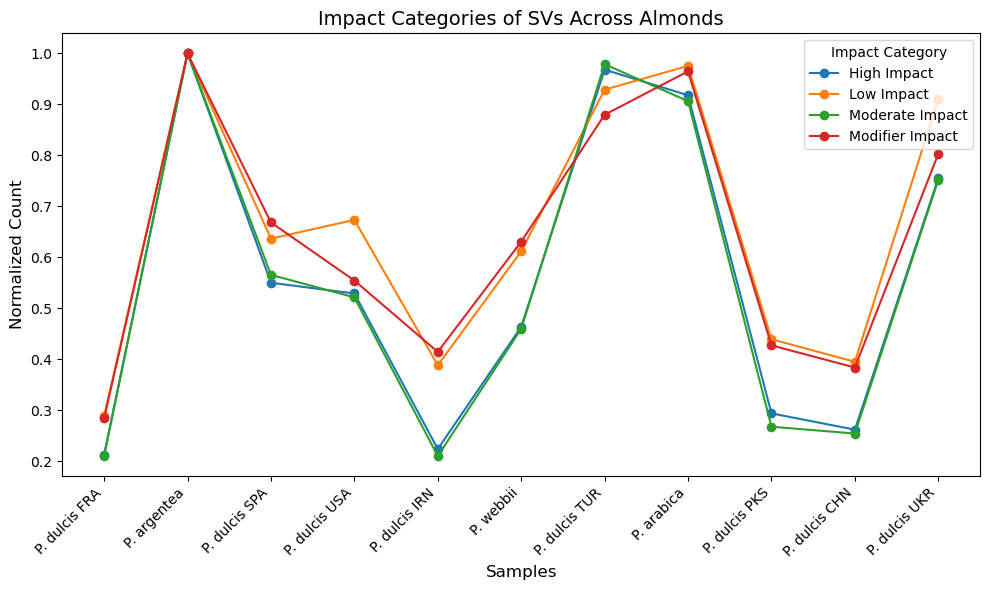

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Data
data = {
    'Sample': ['P. dulcis FRA', 'P. argentea', 'P. dulcis SPA', 'P. dulcis USA', 'P. dulcis IRN',
               'P. webbii', 'P. dulcis TUR', 'P. arabica', 'P. dulcis PKS', 'P. dulcis CHN', 'P. dulcis UKR'],
    'High Impact': [2143391, 10063754, 5538624, 5326819, 2256991, 4668384, 9743408, 9238528, 2960520, 2639622, 7600962],
    'Low Impact': [951, 3291, 2096, 2217, 1279, 2014, 3057, 3211, 1447, 1301, 2997],
    'Moderate Impact': [4017277, 19062332, 10787290, 9944364, 4016213, 8768772, 18661111, 17278509, 5110023, 4854532, 14339325],
    'Modifier Impact': [42476, 149237, 99786, 82788, 61896, 94157, 131288, 144004, 63817, 57320, 119872]
}

 
df = pd.DataFrame(data)
impact_categories = ['High Impact', 'Low Impact', 'Moderate Impact', 'Modifier Impact']
for category in impact_categories:
    df[category] = df[category] / df[category].max()

#normalize
plt.figure(figsize=(10, 6))
for category in impact_categories:
    plt.plot(df['Sample'], df[category], marker='o', label=category)

    
plt.xlabel('Samples', fontsize=12)
plt.ylabel('Normalized Count', fontsize=12)
plt.title('Impact Categories of SVs Across Almonds', fontsize=14)
plt.legend(title="Impact Category")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('/Users/ykaya/Downloads/peptide/dulcis_admixture_NJ/Impact_GR.pdf')
plt.show()

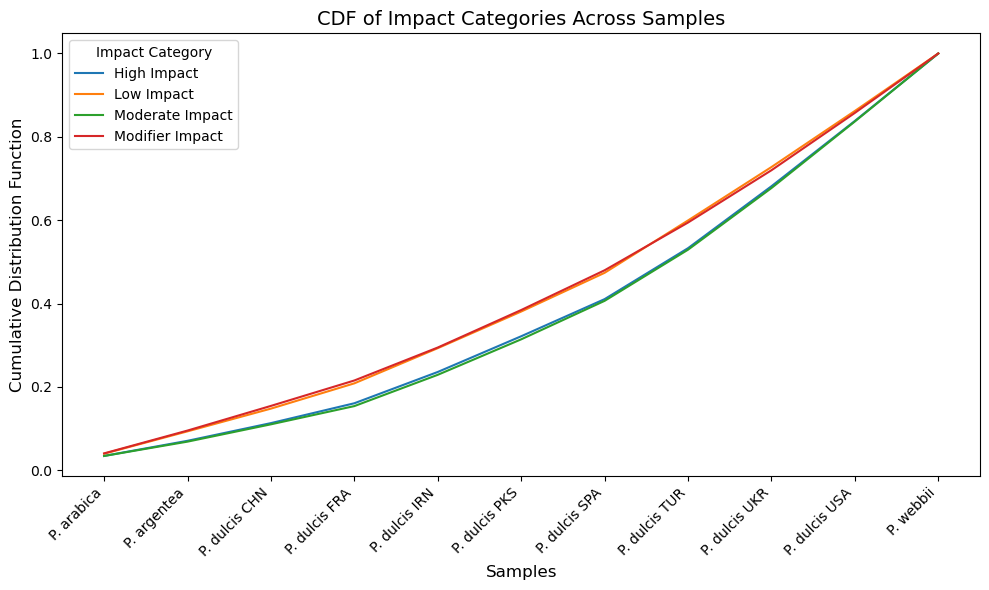

In [16]:
impact_categories = ['High Impact', 'Low Impact', 'Moderate Impact', 'Modifier Impact']

cdf_data = {}
for category in impact_categories:
    sorted_data = sorted(df[category])
    cdf = [sum(sorted_data[:i+1]) / sum(sorted_data) for i in range(len(sorted_data))]
    cdf_data[category] = cdf

plt.figure(figsize=(10, 6))
for category, cdf in cdf_data.items():
    plt.plot(sorted(df['Sample']), cdf, label=category)

plt.xlabel('Samples', fontsize=12)
plt.ylabel('Cumulative Distribution Function', fontsize=12)
plt.title('CDF of Impact Categories Across Samples', fontsize=14)
plt.legend(title="Impact Category")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [21]:
## Admixture

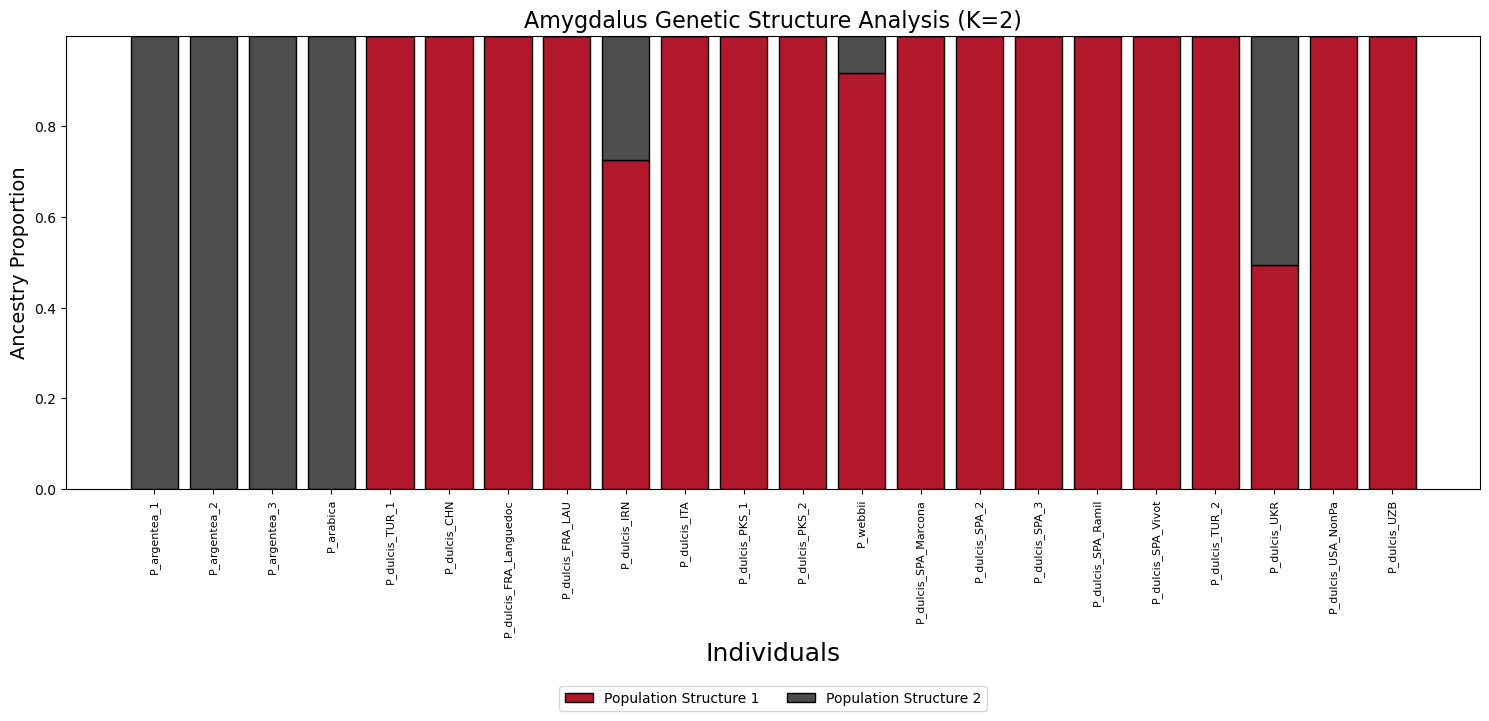

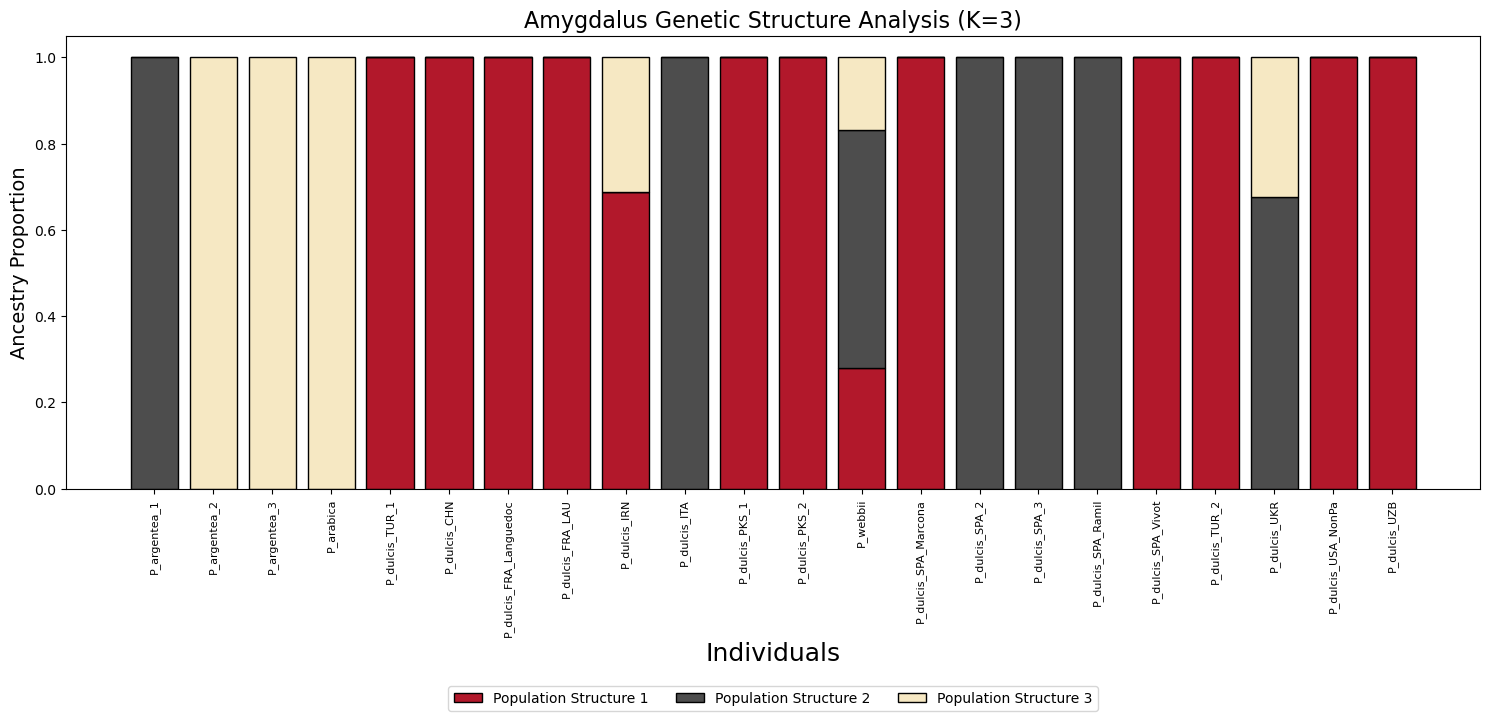

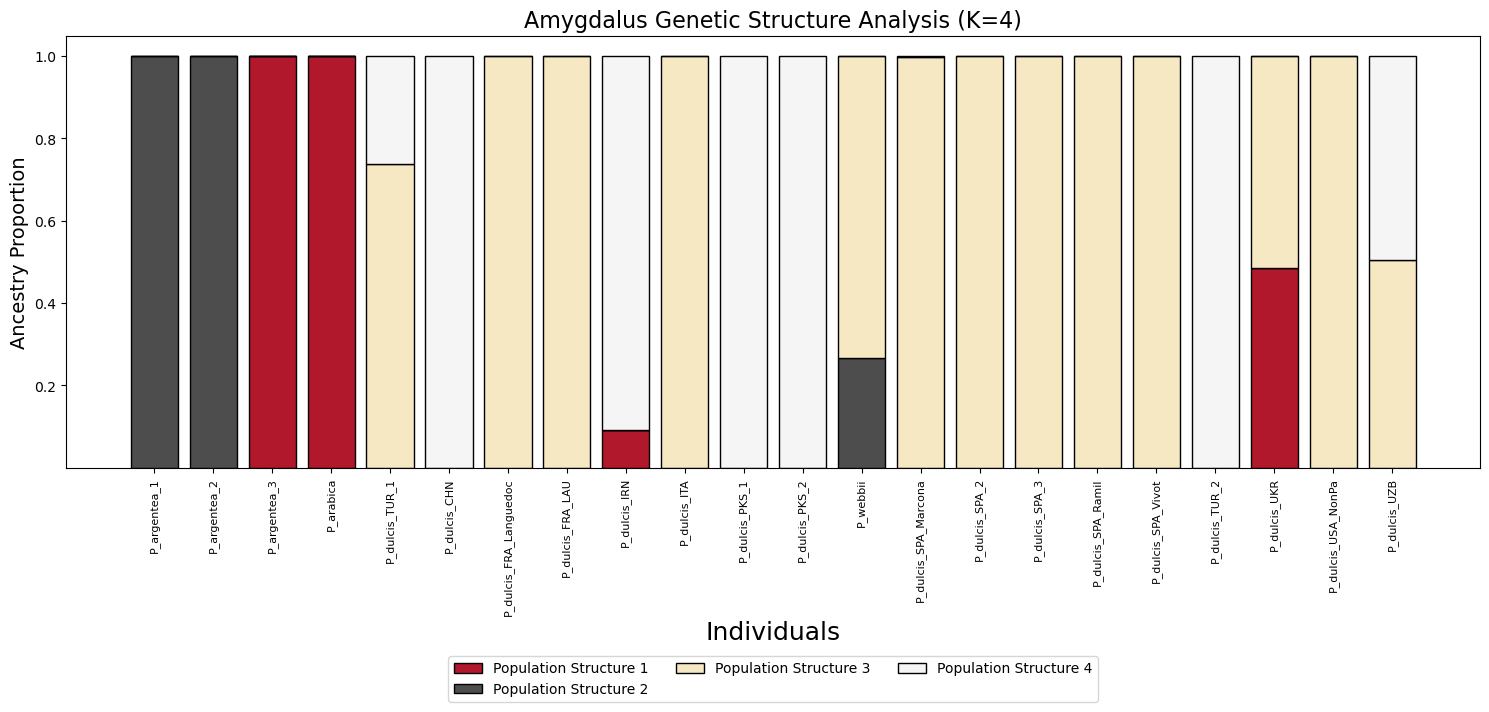

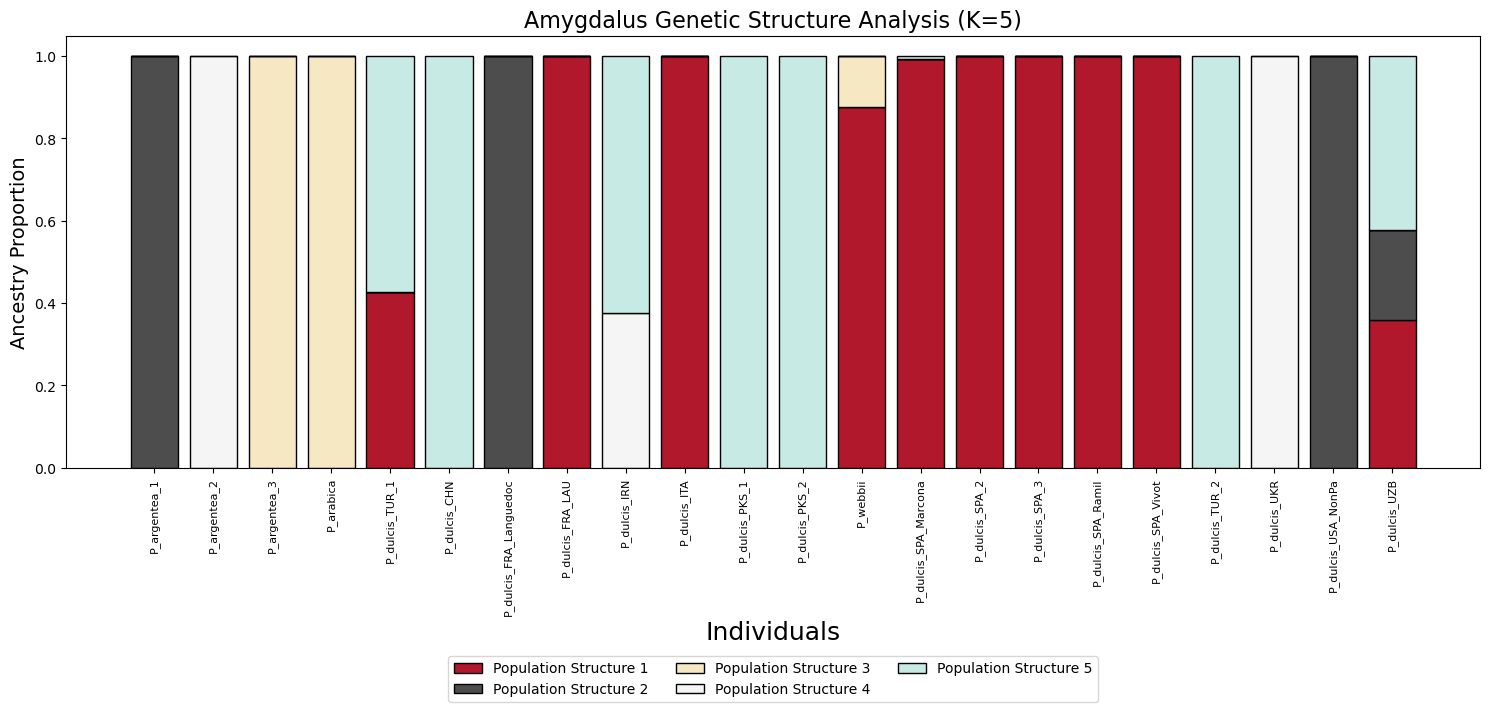

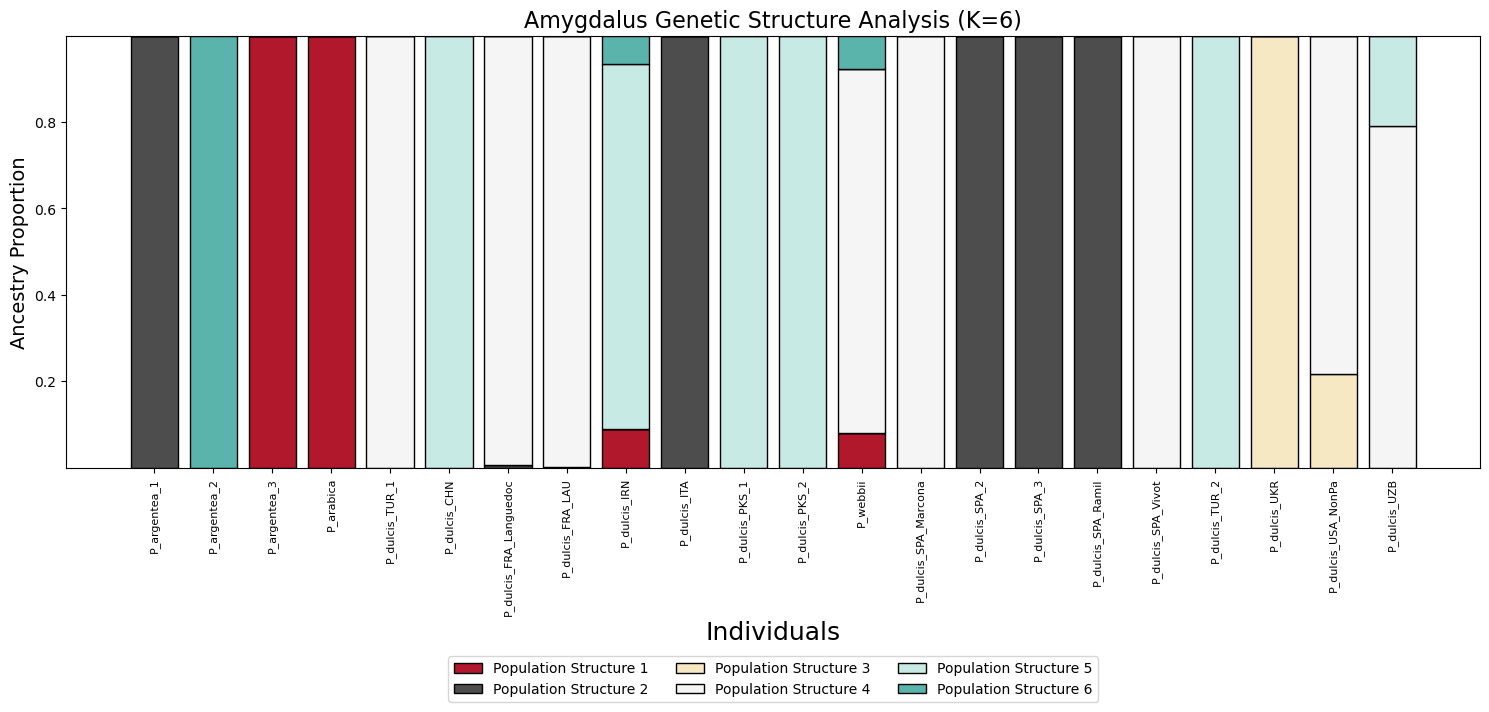

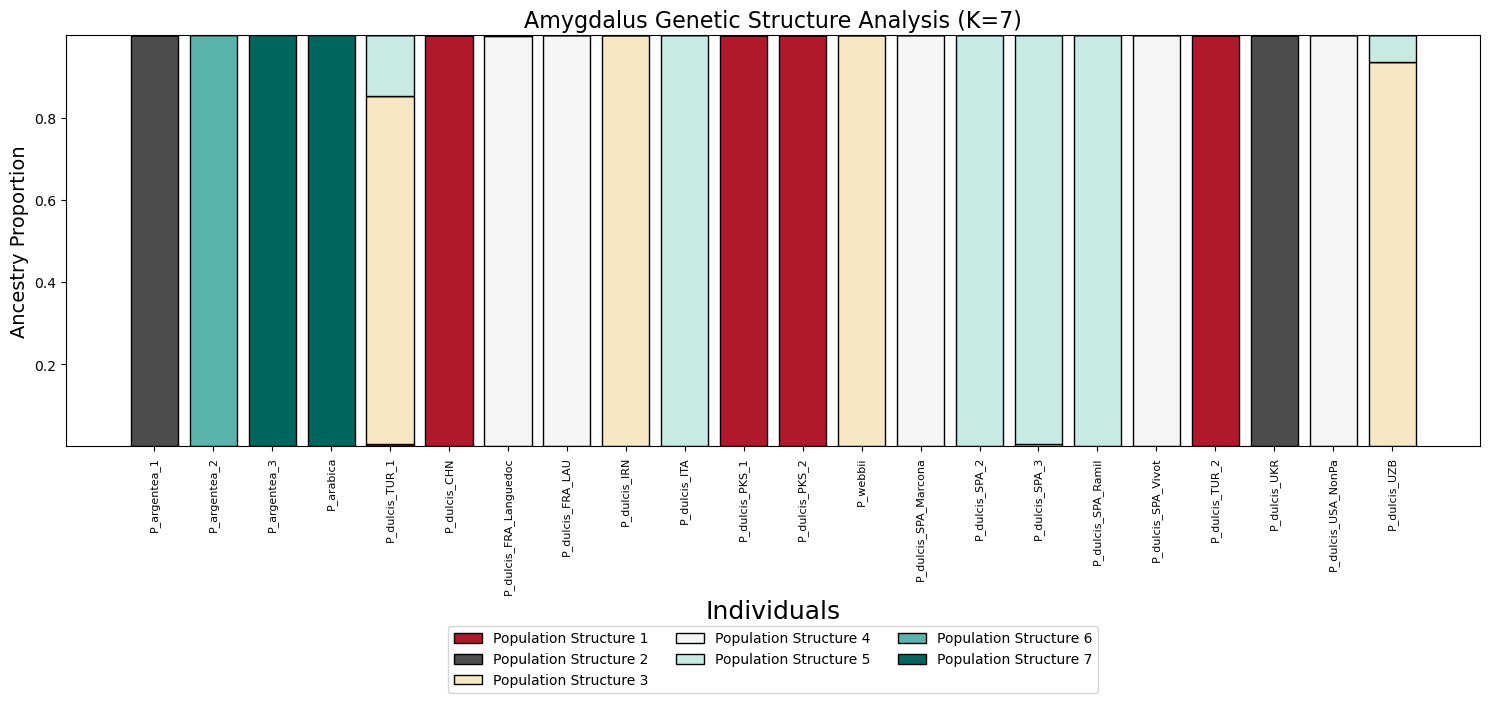

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import glob
import os

 
file_path = "/Users/ykaya/Downloads/peptide/dulcis_admixture_NJ/"
q_files = sorted(glob.glob(os.path.join(file_path, "dulcis_popgen.*.Q")))

 
sample_order = [
    "P_argentea_1", "P_argentea_2", "P_argentea_3", 
    "P_arabica", "P_dulcis_TUR_1", "P_dulcis_CHN", "P_dulcis_FRA_Languedoc",
    "P_dulcis_FRA_LAU", "P_dulcis_IRN", "P_dulcis_ITA", "P_dulcis_PKS_1", "P_dulcis_PKS_2", "P_webbii",
    "P_dulcis_SPA_Marcona", "P_dulcis_SPA_2", "P_dulcis_SPA_3", "P_dulcis_SPA_Ramil", "P_dulcis_SPA_Vivot",
    "P_dulcis_TUR_2", "P_dulcis_UKR", "P_dulcis_USA_NonPa", "P_dulcis_UZB"
]

 
colors = [
    "#b2182b", "#4d4d4d", "#f6e8c3", "#f5f5f5", 
    "#c7eae5", "#5ab4ac", "#01665e"
]

 
for q_file in q_files:
   
    k = int(q_file.split('.')[-2]) 
    admixture_data = pd.read_csv(q_file, sep=' ', header=None)
    admixture_data['sample'] = sample_order
    admixture_data = admixture_data.set_index('sample').loc[sample_order]

    fig, ax = plt.subplots(figsize=(15, 8))
    bottom = np.zeros(len(admixture_data))  

    for i in range(k):
        ax.bar(
            range(len(admixture_data)),   
            admixture_data[i],  
            bottom=bottom,  
            color=colors[i % len(colors)],   
            edgecolor='black',
            label=f'Population Structure {i+1}'
        )
        bottom += admixture_data[i]
    

    ax.set_title(f"Amygdalus Genetic Structure Analysis (K={k})", fontsize=16)
    ax.set_xticks(range(len(admixture_data)))
    ax.set_xlabel("Individuals", fontsize=18)   
    ax.set_ylabel("Ancestry Proportion", fontsize=14)   

    ax.set_xticklabels(sample_order, rotation=90, fontsize=8)   
    

    ax.legend(
        loc='upper center',
        bbox_to_anchor=(0.5, -0.42),  
        ncol=3, fontsize=10, frameon=True
    )
    
 
    plt.tight_layout()
    plt.savefig(os.path.join(file_path, f"admixture_plot_k{k}.pdf"))
    plt.show()

In [29]:
#Best cv value

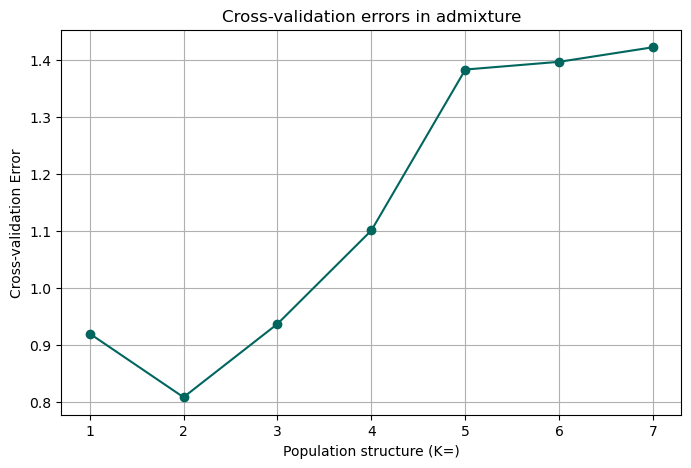

2

In [33]:
import matplotlib.pyplot as plt
k_values = [1, 2, 3, 4, 5, 6, 7]
cv_errors = [0.92, 0.80828, 0.93687, 1.10080, 1.38294, 1.39653, 1.42209]

plt.figure(figsize=(8, 5))
plt.plot(k_values, cv_errors, marker='o', linestyle='-', color='#01665e')
plt.title('Cross-validation errors in admixture')
plt.xlabel('Population structure (K=)')
plt.ylabel('Cross-validation Error')
plt.grid(True)
plt.xticks(k_values) 

plt.savefig('/Users/ykaya/Downloads/peptide/dulcis_admixture_NJ/k-value_dulcis.pdf')
plt.show()
min_error = min(cv_errors)
best_k = k_values[cv_errors.index(min_error)]
best_k